# Usage (details: policy measures)
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.8.3-alpha.new.224'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

184

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **12th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{

3

: 

['Holy See']

,
 

4

: 

['Myanmar', 'Hungary', 'Tanzania']

,
 

5

: 

[

'Papua New Guinea'

, 

'Jordan'

, 

'Antigua and Barbuda'

, 

'Georgia'

, 

'Grenada'

,
     

'Brunei'

, 

'Fiji'

]

,
 

6

: 

[

'Seychelles'

, 

'Equatorial Guinea'

, 

'Libya'

, 

'Yemen'

, 

'Cambodia'

, 

'Belize'

,
     

'Ireland'

, 

'Burundi'

, 

'Jamaica'

, 

'Spain'

, 

'Tunisia'

, 

'Slovenia'

, 

'Uganda'

,
     

'Czech Republic'

, 

'Dominica'

, 

'Slovakia'

]

,
 

7

: 

[

'Israel'

, 

'Paraguay'

, 

'Australia'

, 

'South Sudan'

, 

'Mauritius'

,
     

'San Marino'

, 

'Trinidad and Tobago'

, 

'Zimbabwe'

,
     

'Saint Vincent and the Grenadines'

, 

'Afghanistan'

, 

'Andorra'

,
     

'Guinea-Bissau'

, 

'Malawi'

, 

'Kazakhstan'

, 

'Bahamas'

, 

'Colombia'

, 

'Botswana'

,
     

'New Zealand'

, 

'Namibia'

, 

'Nepal'

, 

'Malta'

, 

'Lesotho'

, 

'Lebanon'

,
     

'Central African Republic'

, 

'Montenegro'

, 

'Gambia'

,
     

'Sao Tome and Principe'

, 

'Guyana'

, 

'Netherlands'

]

,
 

8

: 

[

'Madagascar'

, 

'Ethiopia'

, 

'Kenya'

, 

'Luxembourg'

, 

'Vietnam'

,
     

'Liechtenstein'

, 

'Croatia'

, 

'Cyprus'

, 

'Morocco'

, 

'Iceland'

, 

'Eritrea'

,
     

'Zambia'

, 

'Saint Lucia'

, 

'Thailand'

, 

'Djibouti'

, 

'Comoros'

, 

'Kyrgyzstan'

,
     

'Niger'

, 

'Angola'

, 

'Argentina'

, 

'Mozambique'

, 

'Sudan'

, 

'Monaco'

,
     

'Palestine'

, 

'Lithuania'

, 

'Rwanda'

, 

'Sri Lanka'

, 

'Austria'

, 

'Nicaragua'

,
     

'Denmark'

]

,
 

9

: 

[

'Ukraine'

, 

'Benin'

, 

'Barbados'

, 

'Norway'

, 

'Japan'

, 

'Korea, South'

,
     

'Poland'

, 

'Costa Rica'

, 

'Mauritania'

, 

'Cameroon'

, 

'Taiwan'

, 

'China'

,
     

'Ghana'

, 

'Greece'

, 

'Bhutan'

, 

'Chad'

, 

'Philippines'

, 

'Liberia'

, 

'India'

,
     

'Syria'

, 

'Haiti'

, 

'Malaysia'

, 

'Maldives'

, 

'Bermuda'

, 

'Qatar'

, 

'Tajikistan'

,
     

'Suriname'

, 

'Mongolia'

, 

'Ecuador'

, 

'El Salvador'

, 

'South Africa'

]

,
 

10

: 

[

'Belarus'

, 

'Belgium'

, 

'Gabon'

, 

'Saudi Arabia'

, 

'Albania'

, 

'Mali'

, 

'Cuba'

,
      

'Romania'

, 

'Kosovo'

, 

'Chile'

, 

'Somalia'

, 

'Singapore'

, 

'Pakistan'

,
      

'Serbia'

, 

'Senegal'

, 

'Azerbaijan'

, 

'Burkina Faso'

, 

'Finland'

, 

'Congo'

,
      

'Cape Verde'

, 

'Germany'

, 

'Portugal'

, 

'Sierra Leone'

, 

'Guatemala'

,
      

'Estonia'

, 

'Swaziland'

, 

'Venezuela'

, 

'Uzbekistan'

, 

'Indonesia'

, 

'Canada'

,
      

'Uruguay'

, 

'Oman'

]

,
 

11

: 

[

'Togo'

, 

'United Arab Emirates'

, 

'Switzerland'

, 

'Guinea'

, 

'Latvia'

,
      

'Italy'

, 

'Honduras'

, 

'Macedonia'

, 

'Peru'

, 

'Moldova'

, 

'Bangladesh'

,
      

'Bulgaria'

, 

'Panama'

, 

'Algeria'

, 

'Iraq'

, 

'Egypt'

]

,
 

12

: 

[

'Armenia'

, 

'Brazil'

, 

'Bosnia and Herzegovina'

, 

'Nigeria'

, 

'Mexico'

,
      

'Kuwait'

, 

'Dominican Republic'

, 

'Bahrain'

, 

'United States'

, 

'France'

,
      

'Turkey'

]

,
 

13

: 

['Russia', 'Iran', 'Bolivia']

}

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=12)
# The number of countries
len(analyser.countries)

14

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{

12

: 

[

'Armenia'

, 

'Brazil'

, 

'Bosnia and Herzegovina'

, 

'Nigeria'

, 

'Mexico'

,
      

'Kuwait'

, 

'Dominican Republic'

, 

'Bahrain'

, 

'United States'

, 

'France'

,
      

'Turkey'

]

,
 

13

: 

['Russia', 'Iran', 'Bolivia']

}

In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Russia  0th    Past  12Feb2020  06May2020   330457362
        1st    Past  07May2020  18May2020   330457362
        2nd    Past  19May2020  29May2020   330457362
        3rd    Past  30May2020  09Jun2020   330457362
        4th    Past  10Jun2020  20Jun2020   330457362
        5th    Past  21Jun2020  03Jul2020   330457362
        6th    Past  04Jul2020  17Jul2020   330457362
        7th    Past  18Jul2020  31Jul2020   330457362
        8th    Past  01Aug2020  16Aug2020   330457362
        9th    Past  17Aug2020  02Sep2020   330457362
        10th   Past  03Sep2020  19Sep2020   330457362
        11th   Past  20Sep2020  02Oct2020   330457362
        12th   Past  03Oct2020  14Oct2020   330457362
Iran    0th    Past  26Feb2020  29Mar2020    81800269
        1st    Past  30Mar2020  17Apr2020    81800269
        2nd    Past  18Apr2020  13May2020    81800269
        3rd    Past  14May2020  31May2020    81800269
        4th    Past  01Jun2020  16Jun2020    81800269
        5th    Past  17Jun2020  01Jul2020    81800269
        6th    Past  02Jul2020  16Jul2020    81800269
        7th    Past  17Jul2020  31Jul2020    81800269
        8th    Past  01Aug2020  16Aug2020    81800269
        9th    Past  17Aug2020  05Sep2020    81800269
        10th   Past  06Sep2020  20Sep2020    81800269
        11th   Past  21Sep2020  02Oct2020    81800269
        12th   Past  03Oct2020  14Oct2020    81800269
Bolivia 0th    Past  01Apr2020  13Jun2020    11353142
        1st    Past  14Jun2020  25Jun2020    11353142
        2nd    Past  26Jun2020  05Jul2020    11353142
        3rd    Past  06Jul2020  14Jul2020    11353142
        4th    Past  15Jul2020  22Jul2020    11353142
        5th    Past  23Jul2020  31Jul2020    11353142
        6th    Past  01Aug2020  09Aug2020    11353142
        7th    Past  10Aug2020  17Aug2020    11353142
        8th    Past  18Aug2020  25Aug2020    11353142
        9th    Past  26Aug2020  02Sep2020    11353142
        10th   Past  03Sep2020  10Sep2020    11353142
        11th   Past  11Sep2020  22Sep2020    11353142
        12th   Past  23Sep2020  14Oct2020    11353142

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	TUR,  2nd phase (30Apr2020 - 08May2020): finished 1191 trials in 0 min 35 sec

	BIH, 10th phase (26Sep2020 - 05Oct2020): finished  209 trials in 0 min  5 sec

	KWT, 11th phase (28Sep2020 - 14Oct2020): finished  209 trials in 0 min  5 sec

	ARM,  2nd phase (29May2020 - 12Jun2020): finished 1767 trials in 1 min  0 sec

	BRA, 11th phase (25Sep2020 - 14Oct2020): finished 1728 trials in 1 min  0 sec

	DOM,  1st phase (23May2020 - 14Jun2020): finished 1762 trials in 1 min  0 sec

	FRA,  9th phase (10Sep2020 - 17Sep2020): finished  735 trials in 0 min 20 sec

	BOL,  4th phase (15Jul2020 - 22Jul2020): finished 1676 trials in 1 min  0 sec

	BHR,  5th phase (07Jul2020 - 19Jul2020): finished 1663 trials in 1 min  0 sec

	NGA,  7th phase (21Jul2020 - 07Aug2020): finished 1583 trials in 1 min  0 sec

	FRA,  5th phase (29May2020 - 08Jul2020): finished 1552 trials in 1 min  0 sec

	DOM,  4th phase (14Jul2020 - 23Jul2020): finished 1571 trials in 1 min  0 sec

	BRA,  6th phase (31Jul2020 - 10Aug2020): finished 1018 trials in 0 min 35 sec

	RUS,  4th phase (10Jun2020 - 20Jun2020): finished 1595 trials in 1 min  0 sec

	BHR,  8th phase (22Aug2020 - 05Sep2020): finished 1574 trials in 1 min  0 sec

	TUR,  9th phase (27Aug2020 - 11Sep2020): finished  206 trials in 0 min  5 sec

	IRN,  2nd phase (18Apr2020 - 13May2020): finished  366 trials in 0 min 10 sec

	BRA,  5th phase (22Jul2020 - 30Jul2020): finished 1649 trials in 1 min  0 sec

	NGA, 11th phase (23Sep2020 - 14Oct2020): finished 1361 trials in 0 min 45 sec

	IRN,  4th phase (01Jun2020 - 16Jun2020): finished 1696 trials in 1 min  0 sec

	BHR,  7th phase (06Aug2020 - 21Aug2020): finished 1673 trials in 1 min  0 sec

	ARM,  8th phase (01Aug2020 - 18Aug2020): finished  278 trials in 0 min 10 sec

	BHR,  2nd phase (01Jun2020 - 13Jun2020): finished 1277 trials in 1 min  0 sec

	MEX, 11th phase (04Oct2020 - 14Oct2020): finished 1224 trials in 1 min  0 sec

	MEX, 10th phase (23Sep2020 - 03Oct2020): finished  164 trials in 0 min  5 sec

	USA,  0th phase (09Feb2020 - 04May2020): finished 1155 trials in 1 min  0 sec

	USA,  2nd phase (04Jun2020 - 24Jun2020): finished 1191 trials in 1 min  0 sec

	MEX,  5th phase (19Jul2020 - 31Jul2020): finished 1331 trials in 1 min  0 sec

	BIH,  3rd phase (24Jul2020 - 01Aug2020): finished 1374 trials in 1 min  0 sec

	KWT,  9th phase (02Sep2020 - 13Sep2020): finished 1379 trials in 1 min  0 sec

	TUR, 11th phase (26Sep2020 - 14Oct2020): finished  146 trials in 0 min  5 sec

	BOL,  7th phase (10Aug2020 - 17Aug2020): finished  272 trials in 0 min 10 sec

	MEX,  7th phase (12Aug2020 - 24Aug2020): finished 1371 trials in 1 min  0 sec

	BOL,  3rd phase (06Jul2020 - 14Jul2020): finished  765 trials in 0 min 30 sec

	USA,  4th phase (08Jul2020 - 17Jul2020): finished  422 trials in 0 min 15 sec

	MEX,  4th phase (08Jul2020 - 18Jul2020): finished 1313 trials in 1 min  0 sec

	FRA,  0th phase (12Feb2020 - 24Mar2020): finished 1128 trials in 1 min  0 sec

	KWT,  1st phase (13May2020 - 27May2020): finished 1292 trials in 1 min  0 sec

	FRA,  4th phase (05May2020 - 28May2020): finished 1276 trials in 1 min  0 sec

	BIH,  1st phase (21Jun2020 - 14Jul2020): finished 1300 trials in 1 min  0 sec

	RUS,  6th phase (04Jul2020 - 17Jul2020): finished 1295 trials in 1 min  0 sec

	NGA,  2nd phase (07Jun2020 - 17Jun2020): finished  277 trials in 0 min 10 sec

	RUS,  0th phase (12Feb2020 - 06May2020): finished 1309 trials in 1 min  0 sec

	BRA,  1st phase (27May2020 - 13Jun2020): finished 1296 trials in 1 min  0 sec

	KWT, 10th phase (14Sep2020 - 27Sep2020): finished  278 trials in 0 min 10 sec

	BRA,  3rd phase (27Jun2020 - 08Jul2020): finished 1373 trials in 1 min  0 sec

	RUS,  8th phase (01Aug2020 - 16Aug2020): finished 1374 trials in 1 min  0 sec

	IRN,  6th phase (02Jul2020 - 16Jul2020): finished  184 trials in 0 min  5 sec

	MEX,  0th phase (03Mar2020 - 23May2020): finished 1321 trials in 1 min  0 sec

	NGA,  5th phase (05Jul2020 - 12Jul2020): finished  344 trials in 0 min 10 sec

	NGA,  8th phase (08Aug2020 - 17Aug2020): finished 1519 trials in 1 min  0 sec

	NGA, 10th phase (02Sep2020 - 22Sep2020): finished 1485 trials in 1 min  0 sec

	TUR,  3rd phase (09May2020 - 22May2020): finished 1489 trials in 1 min  0 sec

	TUR, 10th phase (12Sep2020 - 25Sep2020): finished  171 trials in 0 min  5 sec

	BRA,  8th phase (20Aug2020 - 29Aug2020): finished 1495 trials in 1 min  0 sec

	USA,  6th phase (28Jul2020 - 07Aug2020): finished  334 trials in 0 min 10 sec

	DOM,  8th phase (21Aug2020 - 02Sep2020): finished  338 trials in 0 min 10 sec

	ARM, 11th phase (03Oct2020 - 14Oct2020): finished  165 trials in 0 min  5 sec

	ARM,  5th phase (04Jul2020 - 11Jul2020): finished 1475 trials in 1 min  0 sec

	FRA,  7th phase (06Aug2020 - 25Aug2020): finished  842 trials in 0 min 30 sec

	MEX,  2nd phase (11Jun2020 - 24Jun2020): finished 1471 trials in 1 min  0 sec

	ARM,  0th phase (17Mar2020 - 09May2020): finished 1472 trials in 1 min  0 sec

	FRA,  2nd phase (05Apr2020 - 20Apr2020): finished 1504 trials in 1 min  0 sec

	KWT,  5th phase (07Jul2020 - 20Jul2020): finished 1481 trials in 1 min  0 sec

	BRA,  0th phase (16Mar2020 - 26May2020): finished 1415 trials in 1 min  0 sec

	KWT,  0th phase (08Mar2020 - 12May2020): finished 1304 trials in 1 min  0 sec

	IRN,  0th phase (26Feb2020 - 29Mar2020): finished 1498 trials in 1 min  0 sec

	USA,  9th phase (03Sep2020 - 16Sep2020): finished  891 trials in 0 min 25 sec

	KWT,  7th phase (05Aug2020 - 17Aug2020): finished  219 trials in 0 min  5 sec

	TUR,  8th phase (09Aug2020 - 26Aug2020): finished 1594 trials in 1 min  0 sec

	RUS, 11th phase (20Sep2020 - 02Oct2020): finished 1627 trials in 1 min  0 sec

	BHR,  4th phase (26Jun2020 - 06Jul2020): finished 1533 trials in 1 min  0 sec

	DOM,  6th phase (02Aug2020 - 11Aug2020): finished 1360 trials in 1 min  0 sec

	IRN, 10th phase (06Sep2020 - 20Sep2020): finished 1382 trials in 1 min  0 sec

	KWT,  2nd phase (28May2020 - 07Jun2020): finished 1323 trials in 1 min  0 sec

	KWT,  3rd phase (08Jun2020 - 22Jun2020): finished 1343 trials in 1 min  0 sec

	BOL,  0th phase (01Apr2020 - 13Jun2020): finished 1331 trials in 1 min  0 sec

	BOL,  1st phase (14Jun2020 - 25Jun2020): finished 1386 trials in 1 min  0 sec

	RUS,  1st phase (07May2020 - 18May2020): finished 1345 trials in 1 min  0 sec

	ARM,  6th phase (12Jul2020 - 21Jul2020): finished  266 trials in 0 min 10 sec

	FRA, 10th phase (18Sep2020 - 30Sep2020): finished 1113 trials in 0 min 50 sec

	RUS, 10th phase (03Sep2020 - 19Sep2020): finished 1260 trials in 1 min  0 sec

	TUR,  5th phase (14Jun2020 - 28Jun2020): finished 1275 trials in 1 min  0 sec

	BIH,  6th phase (20Aug2020 - 27Aug2020): finished 1320 trials in 1 min  0 sec

	TUR,  4th phase (23May2020 - 13Jun2020): finished  309 trials in 0 min 10 sec

	IRN, 11th phase (21Sep2020 - 02Oct2020): finished  307 trials in 0 min 10 sec

	BIH,  9th phase (17Sep2020 - 25Sep2020): finished 1359 trials in 1 min  0 sec

	DOM,  2nd phase (15Jun2020 - 01Jul2020): finished  291 trials in 0 min 10 sec

	KWT,  6th phase (21Jul2020 - 04Aug2020): finished  166 trials in 0 min  5 sec

	ARM,  9th phase (19Aug2020 - 15Sep2020): finished  531 trials in 0 min 20 sec

	USA,  1st phase (05May2020 - 03Jun2020): finished 1377 trials in 1 min  0 sec

	NGA,  3rd phase (18Jun2020 - 26Jun2020): finished  308 trials in 0 min 10 sec

	DOM,  0th phase (24Mar2020 - 22May2020): finished 1324 trials in 1 min  0 sec

	IRN,  3rd phase (14May2020 - 31May2020): finished  310 trials in 0 min 10 sec

	IRN,  5th phase (17Jun2020 - 01Jul2020): finished 1413 trials in 1 min  0 sec

	USA,  8th phase (20Aug2020 - 02Sep2020): finished  174 trials in 0 min  5 sec

	ARM,  4th phase (21Jun2020 - 03Jul2020): finished 1449 trials in 1 min  0 sec

	FRA,  6th phase (09Jul2020 - 05Aug2020): finished 1387 trials in 1 min  0 sec

	KWT,  4th phase (23Jun2020 - 06Jul2020): finished 1420 trials in 1 min  0 sec

	BOL,  5th phase (23Jul2020 - 31Jul2020): finished  220 trials in 0 min  5 sec

	ARM,  7th phase (22Jul2020 - 31Jul2020): finished  220 trials in 0 min  5 sec

	NGA,  0th phase (18Mar2020 - 18May2020): finished 1421 trials in 1 min  0 sec

	FRA,  8th phase (26Aug2020 - 09Sep2020): finished 1733 trials in 1 min  0 sec

	TUR,  0th phase (24Mar2020 - 16Apr2020): finished 1768 trials in 1 min  0 sec

	BOL,  6th phase (01Aug2020 - 09Aug2020): finished  219 trials in 0 min  5 sec

	TUR,  6th phase (29Jun2020 - 17Jul2020): finished  216 trials in 0 min  5 sec

	MEX,  1st phase (24May2020 - 10Jun2020): finished 1790 trials in 1 min  0 sec

	IRN,  9th phase (17Aug2020 - 05Sep2020): finished 1786 trials in 1 min  0 sec

	USA,  5th phase (18Jul2020 - 27Jul2020): finished  415 trials in 0 min 10 sec

	RUS,  9th phase (17Aug2020 - 02Sep2020): finished 1794 trials in 1 min  0 sec

	BIH,  0th phase (17Mar2020 - 20Jun2020): finished 1731 trials in 1 min  0 sec

	DOM,  9th phase (03Sep2020 - 15Sep2020): finished 1788 trials in 1 min  0 sec

	BHR, 10th phase (17Sep2020 - 27Sep2020): finished  220 trials in 0 min  5 sec

	MEX,  9th phase (08Sep2020 - 22Sep2020): finished 1787 trials in 1 min  0 sec

	BOL, 10th phase (03Sep2020 - 10Sep2020): finished  596 trials in 0 min 15 sec

	BOL, 11th phase (11Sep2020 - 22Sep2020): finished  220 trials in 0 min  5 sec

	USA, 10th phase (17Sep2020 - 30Sep2020): finished 1188 trials in 0 min 35 sec

	BRA,  7th phase (11Aug2020 - 19Aug2020): finished 1809 trials in 1 min  0 sec

	TUR,  7th phase (18Jul2020 - 08Aug2020): finished  217 trials in 0 min  5 sec

	TUR,  1st phase (17Apr2020 - 29Apr2020): finished 1807 trials in 1 min  0 sec

	MEX,  3rd phase (25Jun2020 - 07Jul2020): finished  758 trials in 0 min 20 sec

	USA,  7th phase (08Aug2020 - 19Aug2020): finished  588 trials in 0 min 15 sec

	BRA,  2nd phase (14Jun2020 - 26Jun2020): finished 1208 trials in 0 min 35 sec

	MEX,  8th phase (25Aug2020 - 07Sep2020): finished 1664 trials in 1 min  0 sec

	IRN,  1st phase (30Mar2020 - 17Apr2020): finished 1639 trials in 1 min  0 sec

	BIH,  2nd phase (15Jul2020 - 23Jul2020): finished 1236 trials in 0 min 45 sec

	NGA,  6th phase (13Jul2020 - 20Jul2020): finished  332 trials in 0 min 15 sec

	RUS,  7th phase (18Jul2020 - 31Jul2020): finished 1346 trials in 1 min  0 sec

	BOL,  9th phase (26Aug2020 - 02Sep2020): finished  282 trials in 0 min 10 sec

	BRA,  4th phase (09Jul2020 - 21Jul2020): finished 1182 trials in 1 min  0 sec

	ARM,  1st phase (10May2020 - 28May2020): finished 1208 trials in 1 min  0 sec

	BIH,  4th phase (02Aug2020 - 10Aug2020): finished 1258 trials in 1 min  0 sec

	BRA,  9th phase (30Aug2020 - 10Sep2020): finished  150 trials in 0 min  5 sec

	FRA,  1st phase (25Mar2020 - 04Apr2020): finished 1313 trials in 1 min  0 sec

	ARM, 10th phase (16Sep2020 - 02Oct2020): finished 1386 trials in 1 min  0 sec

	BOL,  2nd phase (26Jun2020 - 05Jul2020): finished  266 trials in 0 min 10 sec

	NGA,  9th phase (18Aug2020 - 01Sep2020): finished 1372 trials in 1 min  0 sec

	BHR,  6th phase (20Jul2020 - 05Aug2020): finished  163 trials in 0 min  5 sec

	NGA,  4th phase (27Jun2020 - 04Jul2020): finished  208 trials in 0 min  5 sec

	BRA, 10th phase (11Sep2020 - 24Sep2020): finished 1457 trials in 1 min  0 sec

	BIH, 11th phase (06Oct2020 - 14Oct2020): finished 1505 trials in 1 min  0 sec

	IRN,  7th phase (17Jul2020 - 31Jul2020): finished  181 trials in 0 min  5 sec

	ARM,  3rd phase (13Jun2020 - 20Jun2020): finished 1449 trials in 1 min  0 sec

	NGA,  1st phase (19May2020 - 06Jun2020): finished 1444 trials in 1 min  0 sec

	DOM,  7th phase (12Aug2020 - 20Aug2020): finished  320 trials in 0 min 10 sec

	BIH,  8th phase (08Sep2020 - 16Sep2020): finished 1466 trials in 1 min  0 sec

	BHR,  1st phase (07May2020 - 31May2020): finished 1430 trials in 1 min  0 sec

	BHR,  9th phase (06Sep2020 - 16Sep2020): finished 1449 trials in 1 min  0 sec

	BOL,  8th phase (18Aug2020 - 25Aug2020): finished  639 trials in 0 min 25 sec

	RUS,  2nd phase (19May2020 - 29May2020): finished 1420 trials in 1 min  0 sec

	BIH,  7th phase (28Aug2020 - 07Sep2020): finished  472 trials in 0 min 15 sec

	FRA,  3rd phase (21Apr2020 - 04May2020): finished 1464 trials in 1 min  0 sec

	MEX,  6th phase (01Aug2020 - 11Aug2020): finished  361 trials in 0 min 10 sec

	BHR,  0th phase (06Mar2020 - 06May2020): finished 1570 trials in 1 min  0 sec

	DOM, 10th phase (16Sep2020 - 30Sep2020): finished  334 trials in 0 min 10 sec

	DOM, 11th phase (01Oct2020 - 14Oct2020): finished  336 trials in 0 min 10 sec

	RUS,  3rd phase (30May2020 - 09Jun2020): finished 1590 trials in 1 min  0 sec

	DOM,  3rd phase (02Jul2020 - 13Jul2020): finished 1649 trials in 1 min  0 sec

Completed optimization. Total: 30 min 40 sec

In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE    Rt  \
Country Phase                                                        
Russia  0th    Past  12Feb2020  06May2020   330457362  SIR-F  0.02   
        1st    Past  07May2020  18May2020   330457362  SIR-F  2.85   
        2nd    Past  19May2020  29May2020   330457362  SIR-F  1.03   
        3rd    Past  30May2020  09Jun2020   330457362  SIR-F  1.01   
        4th    Past  10Jun2020  20Jun2020   330457362  SIR-F  1.02   
        5th    Past  21Jun2020  03Jul2020   330457362      -     -   
        6th    Past  04Jul2020  17Jul2020   330457362  SIR-F  0.82   
        7th    Past  18Jul2020  31Jul2020   330457362  SIR-F  0.76   
        8th    Past  01Aug2020  16Aug2020   330457362  SIR-F  1.13   
        9th    Past  17Aug2020  02Sep2020   330457362  SIR-F  0.81   
        10th   Past  03Sep2020  19Sep2020   330457362  SIR-F  0.99   
        11th   Past  20Sep2020  02Oct2020   330457362  SIR-F  1.42   
        12th   Past  03Oct2020  14Oct2020   330457362      -     -   
Iran    0th    Past  26Feb2020  29Mar2020    81800269  SIR-F  5.51   
        1st    Past  30Mar2020  17Apr2020    81800269  SIR-F  0.93   
        2nd    Past  18Apr2020  13May2020    81800269  SIR-F  0.76   
        3rd    Past  14May2020  31May2020    81800269  SIR-F  1.29   
        4th    Past  01Jun2020  16Jun2020    81800269  SIR-F  1.16   
        5th    Past  17Jun2020  01Jul2020    81800269  SIR-F  0.92   
        6th    Past  02Jul2020  16Jul2020    81800269  SIR-F  0.92   
        7th    Past  17Jul2020  31Jul2020    81800269  SIR-F  1.03   
        8th    Past  01Aug2020  16Aug2020    81800269      -     -   
        9th    Past  17Aug2020  05Sep2020    81800269  SIR-F  1.16   
        10th   Past  06Sep2020  20Sep2020    81800269  SIR-F  1.23   
        11th   Past  21Sep2020  02Oct2020    81800269  SIR-F  1.56   
        12th   Past  03Oct2020  14Oct2020    81800269      -     -   
Bolivia 0th    Past  01Apr2020  13Jun2020    11353142  SIR-F  8.49   
        1st    Past  14Jun2020  25Jun2020    11353142  SIR-F  2.27   
        2nd    Past  26Jun2020  05Jul2020    11353142  SIR-F  2.45   
        3rd    Past  06Jul2020  14Jul2020    11353142  SIR-F  2.51   
        4th    Past  15Jul2020  22Jul2020    11353142  SIR-F  3.86   
        5th    Past  23Jul2020  31Jul2020    11353142  SIR-F  2.99   
        6th    Past  01Aug2020  09Aug2020    11353142  SIR-F  1.86   
        7th    Past  10Aug2020  17Aug2020    11353142  SIR-F  1.24   
        8th    Past  18Aug2020  25Aug2020    11353142  SIR-F  0.68   
        9th    Past  26Aug2020  02Sep2020    11353142  SIR-F  0.43   
        10th   Past  03Sep2020  10Sep2020    11353142  SIR-F  0.31   
        11th   Past  11Sep2020  22Sep2020    11353142  SIR-F  0.62   
        12th   Past  23Sep2020  14Oct2020    11353142      -     -   

                     theta        kappa         rho       sigma  tau  \
Country Phase                                                          
Russia  0th       0.602763     0.544883   0.0340813  0.00229851  360   
        1st     0.00180556  9.34529e-05   0.0131099  0.00449542  360   
        2nd    0.000336749  0.000113213  0.00670743  0.00639185  360   
        3rd    0.000448924  9.80633e-05  0.00484494  0.00469437  360   
        4th    0.000869198  7.16857e-05  0.00415179  0.00399612  360   
        5th              -            -           -           -    -   
        6th      0.0251503  2.41627e-06  0.00220911  0.00261711  360   
        7th    3.08038e-05  4.07714e-05  0.00183396  0.00237691  360   
        8th      0.0223907  1.88817e-06  0.00143307  0.00124059  360   
        9th      0.0180826  6.10105e-06  0.00125223  0.00150289  360   
        10th    0.00423189  2.37659e-05  0.00127485  0.00125617  360   
        11th    0.00240359  2.37659e-05  0.00173015  0.00118781  360   
        12th             -            -           -           -    -   
Iran    0th        0.26389  0.000317872   0.0519398  0.00661935 

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-17,Armenia,0.0183104,0.000116704,0.0195852,0.00374435,0.018,2142,12,66,...,0,0,0,0,0,0,0,0,0,0.0
1,2020-03-18,Armenia,0.0183104,0.000116704,0.0195852,0.00374435,0.018,2142,12,66,...,0,0,0,0,0,0,0,0,0,0.0
2,2020-03-19,Armenia,0.0183104,0.000116704,0.0195852,0.00374435,0.018,2142,12,66,...,0,0,0,0,0,0,0,0,0,0.0
3,2020-03-20,Armenia,0.0183104,0.000116704,0.0195852,0.00374435,0.018,2142,12,66,...,0,0,0,0,0,0,0,0,0,0.0
4,2020-03-21,Armenia,0.0183104,0.000116704,0.0195852,0.00374435,0.018,2142,12,66,...,0,0,0,0,0,0,0,0,0,0.0


### $Rt$: Reprodcution number $\mathrm{[-]}$

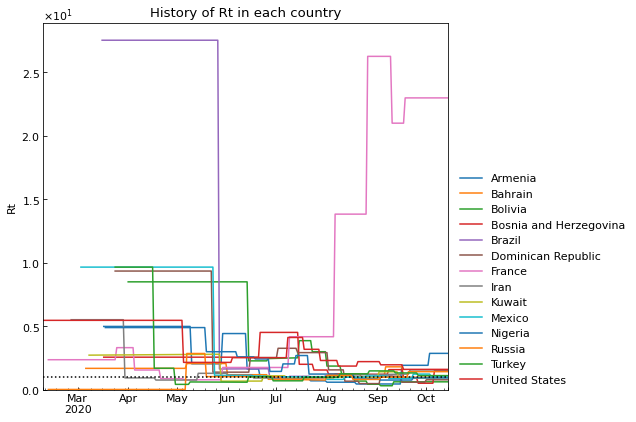

Country,Armenia,Bahrain,Bolivia,Bosnia and Herzegovina,Brazil,Dominican Republic,France,Iran,Kuwait,Mexico,Nigeria,Russia,Turkey,United States
Date,,,,,,,,,,,,,,
2020-10-10,2.86,0.98,0.62,1.53,0.95,0.78,22.97,1.56,0.96,1.01,0.93,1.42,1.11,1.6
2020-10-11,2.86,0.98,0.62,1.53,0.95,0.78,22.97,1.56,0.96,1.01,0.93,1.42,1.11,1.6
2020-10-12,2.86,0.98,0.62,1.53,0.95,0.78,22.97,1.56,0.96,1.01,0.93,1.42,1.11,1.6
2020-10-13,2.86,0.98,0.62,1.53,0.95,0.78,22.97,1.56,0.96,1.01,0.93,1.42,1.11,1.6
2020-10-14,2.86,0.98,0.62,1.53,0.95,0.78,22.97,1.56,0.96,1.01,0.93,1.42,1.11,1.6


In [14]:
analyser.param_history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

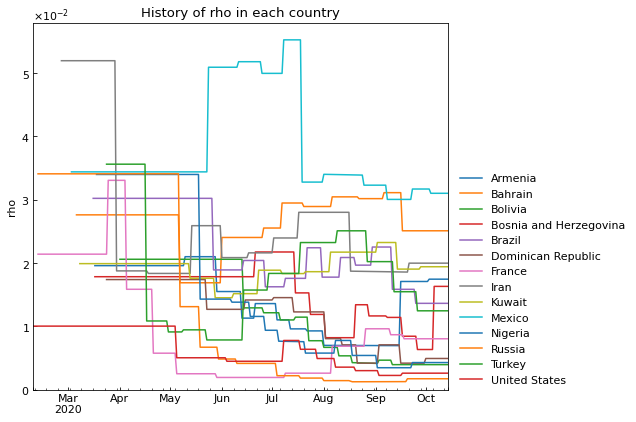

Country,Armenia,Bahrain,Bolivia,Bosnia and Herzegovina,Brazil,Dominican Republic,France,Iran,Kuwait,Mexico,Nigeria,Russia,Turkey,United States
Date,,,,,,,,,,,,,,
2020-10-10,0.01745,0.025089,0.003956,0.016311,0.013634,0.004928,0.008041,0.019978,0.019412,0.031008,0.004286,0.00173,0.012455,0.002609
2020-10-11,0.01745,0.025089,0.003956,0.016311,0.013634,0.004928,0.008041,0.019978,0.019412,0.031008,0.004286,0.00173,0.012455,0.002609
2020-10-12,0.01745,0.025089,0.003956,0.016311,0.013634,0.004928,0.008041,0.019978,0.019412,0.031008,0.004286,0.00173,0.012455,0.002609
2020-10-13,0.01745,0.025089,0.003956,0.016311,0.013634,0.004928,0.008041,0.019978,0.019412,0.031008,0.004286,0.00173,0.012455,0.002609
2020-10-14,0.01745,0.025089,0.003956,0.016311,0.013634,0.004928,0.008041,0.019978,0.019412,0.031008,0.004286,0.00173,0.012455,0.002609


In [15]:
analyser.param_history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

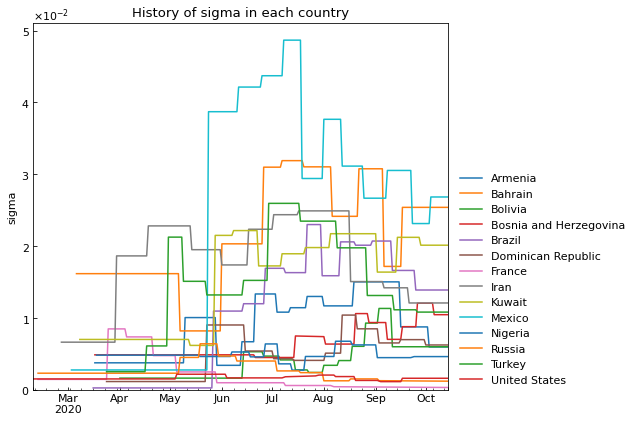

Country,Armenia,Bahrain,Bolivia,Bosnia and Herzegovina,Brazil,Dominican Republic,France,Iran,Kuwait,Mexico,Nigeria,Russia,Turkey,United States
Date,,,,,,,,,,,,,,
2020-10-10,0.005954,0.025396,0.005981,0.010448,0.013885,0.00623,0.000309,0.012079,0.020125,0.026841,0.004612,0.001188,0.010809,0.001593
2020-10-11,0.005954,0.025396,0.005981,0.010448,0.013885,0.00623,0.000309,0.012079,0.020125,0.026841,0.004612,0.001188,0.010809,0.001593
2020-10-12,0.005954,0.025396,0.005981,0.010448,0.013885,0.00623,0.000309,0.012079,0.020125,0.026841,0.004612,0.001188,0.010809,0.001593
2020-10-13,0.005954,0.025396,0.005981,0.010448,0.013885,0.00623,0.000309,0.012079,0.020125,0.026841,0.004612,0.001188,0.010809,0.001593
2020-10-14,0.005954,0.025396,0.005981,0.010448,0.013885,0.00623,0.000309,0.012079,0.020125,0.026841,0.004612,0.001188,0.010809,0.001593


In [16]:
analyser.param_history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

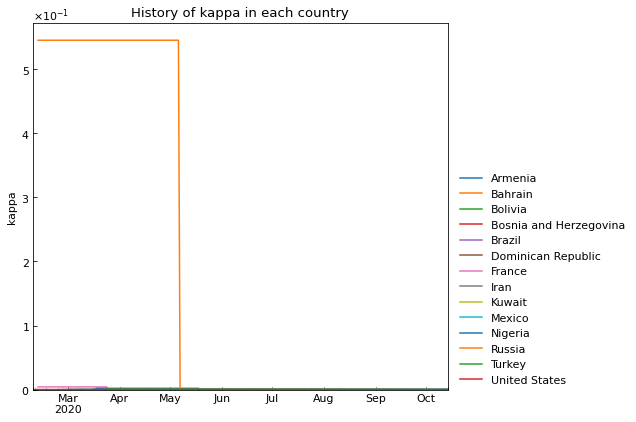

Country,Armenia,Bahrain,Bolivia,Bosnia and Herzegovina,Brazil,Dominican Republic,France,Iran,Kuwait,Mexico,Nigeria,Russia,Turkey,United States
Date,,,,,,,,,,,,,,
2020-10-10,0.00015,0.000071,0.000298,0.000196,0.000111,0.000098,0.000041,0.000192,0.000093,0.000558,0.00001,0.000024,0.000109,0.000041
2020-10-11,0.00015,0.000071,0.000298,0.000196,0.000111,0.000098,0.000041,0.000192,0.000093,0.000558,0.00001,0.000024,0.000109,0.000041
2020-10-12,0.00015,0.000071,0.000298,0.000196,0.000111,0.000098,0.000041,0.000192,0.000093,0.000558,0.00001,0.000024,0.000109,0.000041
2020-10-13,0.00015,0.000071,0.000298,0.000196,0.000111,0.000098,0.000041,0.000192,0.000093,0.000558,0.00001,0.000024,0.000109,0.000041
2020-10-14,0.00015,0.000071,0.000298,0.000196,0.000111,0.000098,0.000041,0.000192,0.000093,0.000558,0.00001,0.000024,0.000109,0.000041


In [17]:
analyser.param_history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

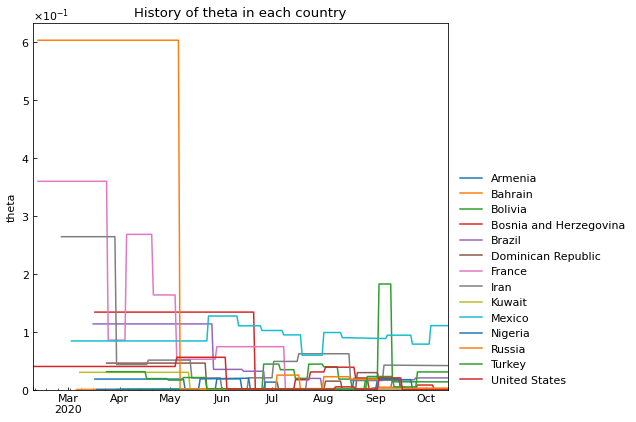

Country,Armenia,Bahrain,Bolivia,Bosnia and Herzegovina,Brazil,Dominican Republic,France,Iran,Kuwait,Mexico,Nigeria,Russia,Turkey,United States
Date,,,,,,,,,,,,,,
2020-10-10,0.00108,0.000898,0.01359,0.000553,0.02031,0.000528,0.000019,0.041569,0.002473,0.110507,0.00146,0.002404,0.030618,0.000019
2020-10-11,0.00108,0.000898,0.01359,0.000553,0.02031,0.000528,0.000019,0.041569,0.002473,0.110507,0.00146,0.002404,0.030618,0.000019
2020-10-12,0.00108,0.000898,0.01359,0.000553,0.02031,0.000528,0.000019,0.041569,0.002473,0.110507,0.00146,0.002404,0.030618,0.000019
2020-10-13,0.00108,0.000898,0.01359,0.000553,0.02031,0.000528,0.000019,0.041569,0.002473,0.110507,0.00146,0.002404,0.030618,0.000019
2020-10-14,0.00108,0.000898,0.01359,0.000553,0.02031,0.000528,0.000019,0.041569,0.002473,0.110507,0.00146,0.002404,0.030618,0.000019


In [18]:
analyser.param_history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43660 entries, 0 to 43841
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 43660 non-null  datetime64[ns]
 1   Country                              43660 non-null  object        
 2   Rt                                   43660 non-null  float64       
 3   theta                                43660 non-null  float64       
 4   kappa                                43660 non-null  float64       
 5   rho                                  43660 non-null  float64       
 6   sigma                                43660 non-null  float64       
 7   School_closing                       43660 non-null  int64         
 8   Workplace_closing                    43660 non-null  int64         
 9   Cancel_events                        43660 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.280337,-0.277567,-0.130979,-0.183739,-0.108645,0.044849,-0.173099,0.043775,-0.136219,-0.243121,-0.069739,-0.157359,0.032488,-0.014732,-0.109117,-0.086681
theta,-0.280337,1.000000,0.961210,0.902362,-0.039122,-0.237298,-0.177048,-0.310200,-0.223554,-0.256049,0.170989,-0.036988,0.100489,-0.388446,-0.436143,-0.071769,-0.129493
kappa,-0.277567,0.961210,1.000000,0.867919,-0.051469,-0.211876,-0.146910,-0.262781,-0.199926,-0.237315,0.207760,-0.003417,0.208210,-0.342432,-0.323805,0.021933,-0.098249
rho,-0.130979,0.902362,0.867919,1.000000,0.231718,-0.176441,-0.162487,-0.333550,-0.217854,-0.203658,0.197809,-0.013535,0.046649,-0.407302,-0.495111,-0.156040,-0.106445
sigma,-0.183739,-0.039122,-0.051469,0.231718,1.000000,0.164290,0.042488,0.079918,0.028023,0.192098,0.178852,0.124931,0.021541,0.025808,-0.128711,0.023434,0.158259
School_closing,-0.108645,-0.237298,-0.211876,-0.176441,0.164290,1.000000,0.760221,0.804928,0.672399,0.701811,0.611266,0.622458,0.500552,0.707005,0.520312,0.232595,0.844192
Workplace_closing,0.044849,-0.177048,-0.146910,-0.162487,0.042488,0.760221,1.000000,0.748601,0.707562,0.660634,0.621502,0.596315,0.512740,0.806157,0.513635,0.345020,0.865648
Cancel_events,-0.173099,-0.310200,-0.262781,-0.333550,0.079918,0.804928,0.748601,1.000000,0.683567,0.591277,0.551989,0.580200,0.580883,0.852576,0.641225,0.559558,0.835476
Gatherings_restrictions,0.043775,-0.223554,-0.199926,-0.217854,0.028023,0.672399,0.707562,0.683567,1.000000,0.761723,0.637905,0.757169,0.531513,0.732357,0.522842,0.321558,0.864531
Transport_closing,-0.136219,-0.256049,-0.237315,-0.203658,0.192098,0.701811,0.660634,0.591277,0.761723,1.000000,0.645957,0.755633,0.433524,0.551376,0.401814,0.111848,0.804492


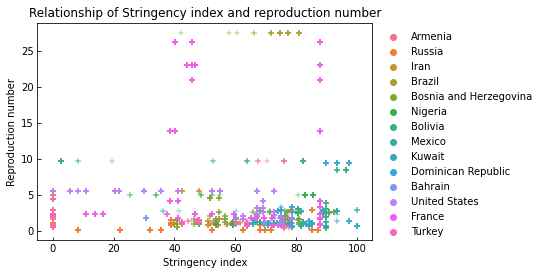

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()